# Exploratory Data Analysis (EDA) Project

### Dataset: Cleaned Sales Data

### Objective
The objective of this notebook is to analyze the cleaned sales dataset to identify patterns, trends, and business insights. The analysis focuses on:

- Understanding sales distribution
- Identifying top-performing countries and product categories
- Analyzing monthly and yearly sales trends
- Evaluating deal size contribution to revenue
- Identifying top customers based on sales performance

The insights obtained from this analysis help in understanding customer behavior and business performance.


## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Clean Dataset

In [2]:
df=pd.read_csv("cleaned_sales_data.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,Not Available,NYC,NY,10022,USA,Unknown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Not Available,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Not Available,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Not Available,Pasadena,CA,90003,USA,Unknown,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,Not Available,San Francisco,CA,Unknown,USA,Unknown,Brown,Julie,Medium


## 3. Basic Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      2823 non-null   object 


In [4]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [6]:
df.shape

(2823, 25)

The dataset contains 2823 rows and 25 columns.  
Each row represents a sales transaction record, and the columns represent different attributes such as product details, customer information, and sales metrics.

In [7]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


### Numerical Data Insights

- Average sales value is approximately 3554, with transactions ranging from 482 to 14082.
- Orders typically contain around 35 units on average.
- Products are moderately priced, with an average price of approximately 83.
- The dataset spans sales from 2003 to 2005, covering a complete yearly sales cycle.
- Variation in sales values indicates differences in customer order size and purchasing behavior.

## 4. Sales Distribution

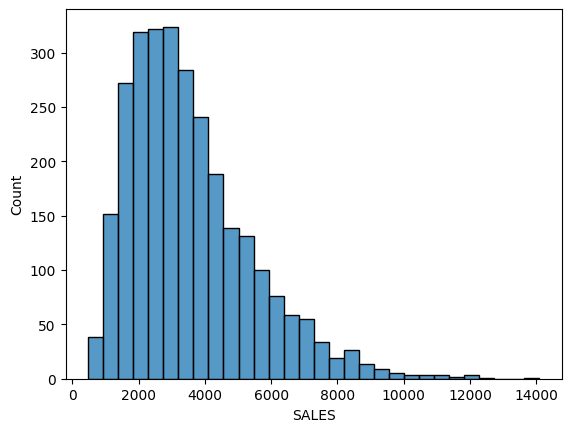

In [8]:
sns.histplot(df['SALES'],bins=30)
plt.show()

### Sales Distribution Insight

The sales distribution shows a right-skewed pattern, indicating that most sales transactions fall within the moderate range between 2000 and 5000. A smaller number of transactions show significantly higher sales values, suggesting occasional large customer orders.

This variation in sales indicates diverse customer purchasing behavior.

## 5. Sales by Country

In [9]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

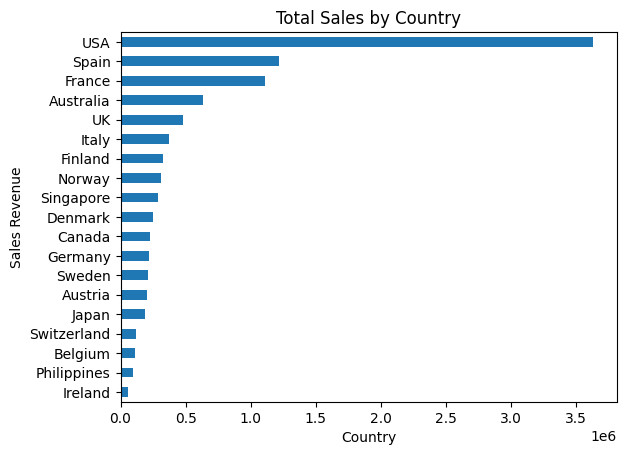

In [11]:
df.groupby('COUNTRY')['SALES'].sum().sort_values().plot(kind='barh')
plt.xlabel("Country")
plt.ylabel("Sales Revenue")
plt.title("Total Sales by Country")
plt.show()

### Sales by Country Insight

The United States generates the highest sales revenue, contributing significantly more than other countries. Spain and France also represent strong markets with high sales performance.

Countries such as Ireland and the Philippines show comparatively lower sales, indicating potential areas for business growth or limited market penetration.

## 6. Sales by Product Line

In [12]:
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
product_sales

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

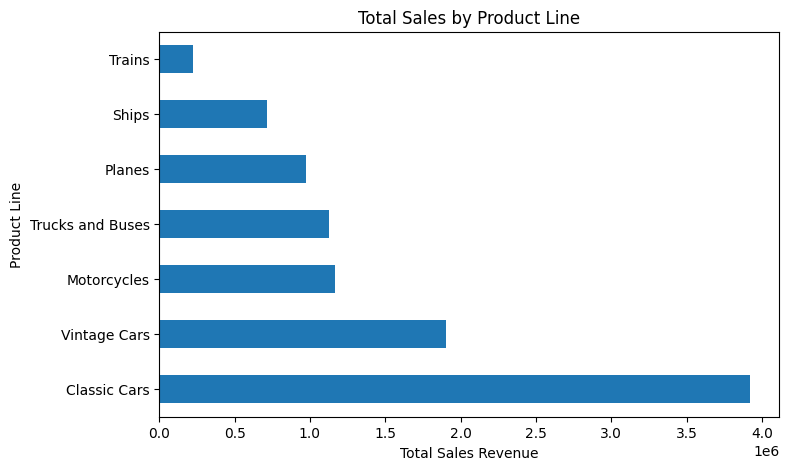

In [13]:
product_sales.plot(kind='barh', figsize=(8,5))
plt.xlabel("Total Sales Revenue")
plt.ylabel("Product Line")
plt.title("Total Sales by Product Line")
plt.show()

### Sales by Product Line Insight

Classic Cars contribute the highest sales revenue, making it the most profitable product category. Vintage Cars and Motorcycles also show strong sales performance.

The Trains product line generates the lowest sales, suggesting lower customer demand compared to other product categories.

## 7. Sales Trend Over Time

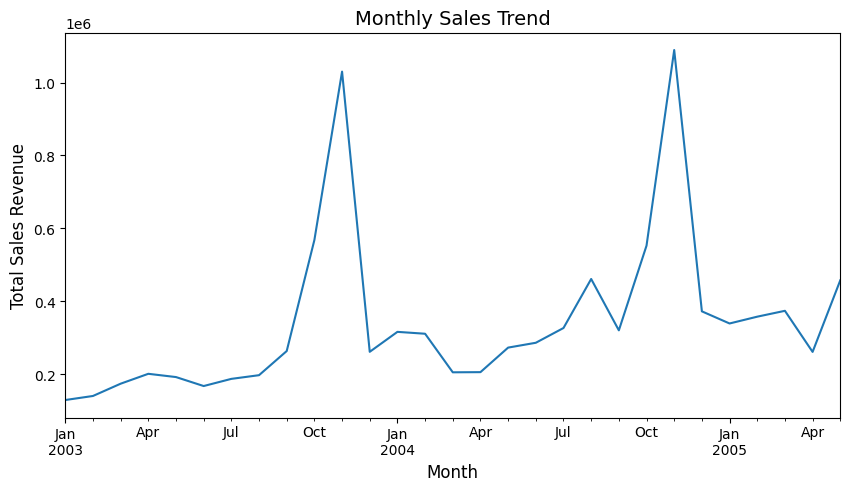

In [15]:
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Revenue", fontsize=12)
plt.show()

### Monthly Sales Trend Insight

The monthly sales trend shows a clear seasonal pattern, with significant sales peaks observed toward the end of the year, particularly around October and November. Sales are relatively lower during the initial months of the year.

This indicates strong seasonal demand during the final quarter, possibly driven by holiday sales or year-end purchasing behavior.

## 8. Deal Size Distribution

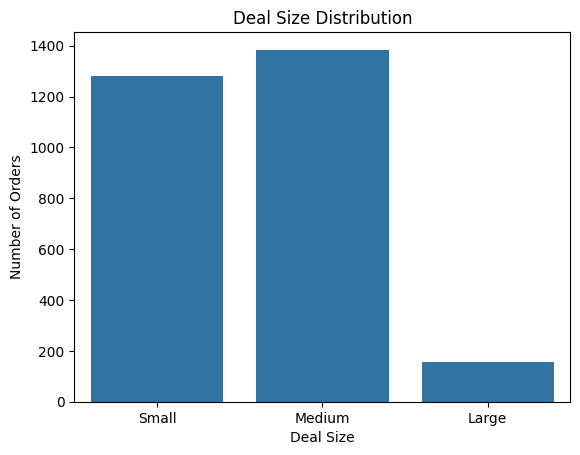

In [17]:
sns.countplot(x='DEALSIZE', data=df)
plt.title("Deal Size Distribution")
plt.xlabel("Deal Size")
plt.ylabel("Number of Orders")
plt.show()

In [18]:
df.groupby('DEALSIZE')['SALES'].sum()

DEALSIZE
Large     1302119.26
Medium    6087432.24
Small     2643077.35
Name: SALES, dtype: float64

### Deal Size Sales Insight

Medium-sized deals contribute the highest total sales revenue, indicating that most business transactions fall within the mid-range order value. Small deals also contribute significantly to total revenue, suggesting high transaction volume.

Large deals generate comparatively lower total revenue, indicating that high-value transactions occur less frequently.

## 9. Top Customers

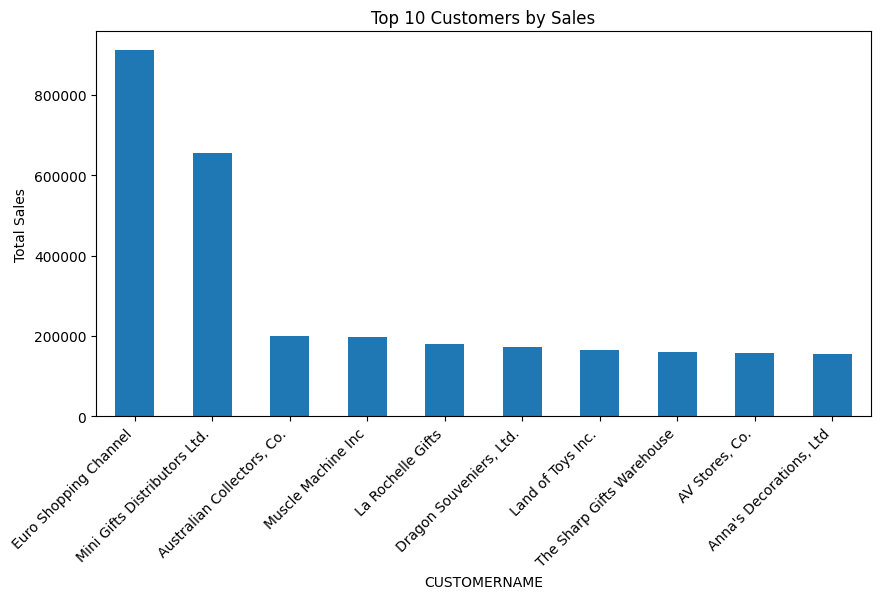

In [19]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Customers by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()

### Top Customers Insight

Euro Shopping Channel is the highest revenue-generating customer, followed by Mini Gifts Distributors Ltd. These customers contribute a significant portion of total sales revenue.

The remaining top customers generate moderate sales, indicating a diversified customer base and reduced dependency on a single client.

## Overall EDA Conclusion

The exploratory data analysis revealed key business insights:

- The United States is the highest revenue-generating market.
- Classic Cars are the top-performing product category.
- Sales show seasonal peaks toward the end of each year.
- Medium-sized deals contribute the highest revenue.
- A few key customers contribute a large portion of sales revenue.